{'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.075, 'kink_slope': 0.356, 'optimal_util_rate': 0.65, 'borrow_amount': 1, 'reserve_size': 1.0}


<Axes: xlabel='x_0'>

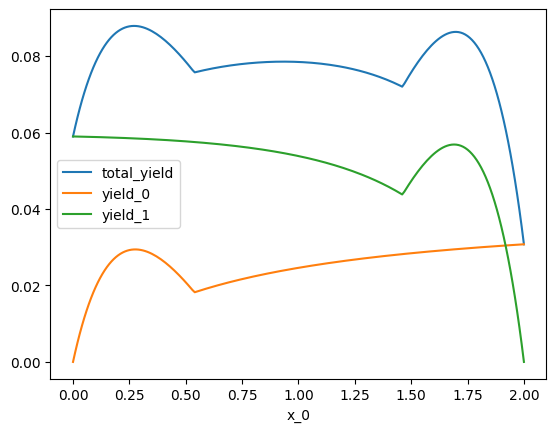

In [88]:
# plotting the curve of allocation to understand the apy characteristics
# yield = alloc * borrow_amount / (1 + alloc) * borrow_rate(borrow_amount/(1+alloc))


import pandas as pd
import numpy as np
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.misc import supply_rate

# {'total_assets': 2.0, 'pools': {'0': {'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.012, 'kink_slope': 0.22, 'optimal_util_rate': 0.65, 'borrow_amount': 0.85, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.075, 'kink_slope': 0.356, 'optimal_util_rate': 0.9, 'borrow_amount': 0.65, 'reserve_size': 1.0}}}
# global: {'0': 1.01647553, '1': 0.98352446}
# global: 0.04538979096671239
# global: calc_strategy_apy 6.970036962160095
# global: get_agg_apy 6.900362946678085
# yiop: {'0': 1.0416744, '1': 0.95832559}
# yiop:  0.045382514761274556
# yiop: calc_strategy_apy 8.5439043175689
# yiop: get_agg_apy 8.610952808355512

pools = {'0': {'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.012, 'kink_slope': 0.22, 'optimal_util_rate': 0.65, 'borrow_amount': 1, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.075, 'kink_slope': 0.356, 'optimal_util_rate': 0.65, 'borrow_amount': 1, 'reserve_size': 1.0}}
# pools ={'0': {'pool_id': '0', 'base_rate': 0.02, 'base_slope': 0.01, 'kink_slope': 0.3, 'optimal_util_rate': 0.5, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.01, 'base_slope': 0.037, 'kink_slope': 0.956, 'optimal_util_rate': 0.75, 'borrow_amount': 0.55, 'reserve_size': 1.0}}
# init_assets_and_pools = generate_assets_and_pools()

# x = np.arange(0, 1.1, 0.01)
# df = pd.DataFrame({'x': x})
# labels = [str(i) for i in range(len(pools))]
# for label in labels:
#     df[label] = [supply_rate(x, pools[label]) for x in df['x']]
# df[['x', '0', '1']].plot(0)
# df.plot(0)
print(pools['1'])
x = np.arange(0, 2.01, 0.01)
y = 2 - x
df = pd.DataFrame({'x_0': x, 'x_1': y})

labels = [str(i) for i in range(len(pools))]
for label in labels:
    yields = []
    reserve_sizes = []
    util_rates = []
    for allocation in df[f'x_{label}']:
        reserve_size = pools[label]['reserve_size'] + allocation
        util_rate = pools[label]['borrow_amount'] / reserve_size
        pool_yield = allocation * supply_rate(util_rate, pools[label])
        yields.append(pool_yield)
        reserve_sizes.append(reserve_size)
        util_rates.append(util_rate)
    df[f'yield_{label}'] = yields
    df[f'reserve_{label}'] = reserve_sizes
    df[f'util_rate_{label}'] = util_rates

df['total_yield'] = df['yield_0'] + df['yield_1']
df['total_reserve'] = df['reserve_0'] + df['reserve_1']
df[['x_0', 'total_yield', 'yield_0', 'yield_1']].plot(0)
# df[df['x_0'] > 0.6]


In [202]:
from sturdy.protocol import AllocateAssets
from sturdy.utils.gloyiop import generate_bounds, global_yiop_allocation_algorithm
from sturdy.utils.yiop import yiop_allocation_algorithm


def calc_apy(pools, allocations):
    curr_yield = 0
    for uid, pool_data in pools.items():
        # print(f'uid: {uid}, pool_data: {pool_data}')
        util_rate = pool_data["borrow_amount"] / (pool_data["reserve_size"] + allocations[uid])
        # util_rate = allocations[uid] / (pool_data['reserve_size'] + allocations[uid])
        pool_yield = allocations[uid] * supply_rate(
            util_rate, pools[uid]
        )
        # print(f'uid {uid}, reserve: {pool_data["reserve_size"]} allocation: {allocations[uid]} util_rate: {util_rate} yield {pool_yield}')
        curr_yield += pool_yield
    return curr_yield


assets_and_pools = {
    'total_assets': 2.0,
    'pools': pools
}
allocation = global_yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))
print('global alloc', allocation)
print('global:', calc_apy(assets_and_pools['pools'], allocation))
allocation  = yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))
print('yiop alloc', allocation)
print('yiop: ', calc_apy(assets_and_pools['pools'], allocation))

generate_bounds(assets_and_pools['pools'], assets_and_pools['total_assets'])

global alloc {'0': 1.23745708, '1': 0.76254291}
global: 0.015321164307749883
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.015320985785258262
            Iterations: 7
            Function evaluations: 21
            Gradient evaluations: 7
yiop alloc {'0': 1.24386595, '1': 0.75613404}
yiop:  0.0153209857610822


[[(0, 0.30000000000000004), (0, 2.0)], [(0.30000000000000004, 2.0), (0, 2.0)]]

In [41]:
# allocations = {'0': 0.93, '1': 0.07}
allocations = {'0': 0.0, '1': 1}
uid = '0'
util_rate = allocations[uid] / pools[uid]['reserve_size']
pool_yield = allocations[uid] * supply_rate(
    util_rate, pools[uid]
)
pool_yield

0.0

{'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.087, 'kink_slope': 0.922, 'optimal_util_rate': 0.75, 'borrow_amount': 0.7, 'reserve_size': 1.0}


<Axes: xlabel='x'>

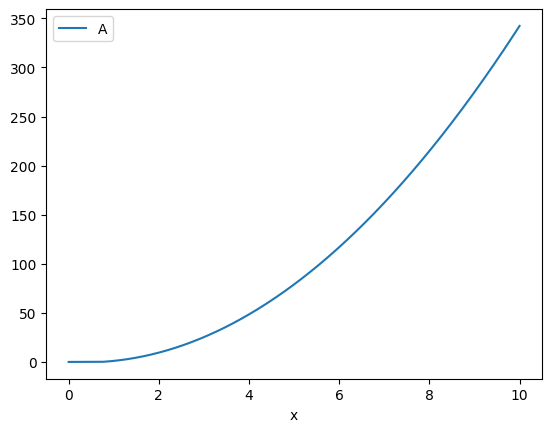

In [8]:
import numpy as np
import pandas as pd
from sturdy.utils.misc import supply_rate
from sturdy.pools import generate_assets_and_pools
assets_and_pools = generate_assets_and_pools()
pools = assets_and_pools['pools']
print(pools['0'])
x = np.arange(0, 10, 0.001)
df = pd.DataFrame({'x': x})
df['A'] = [supply_rate(x, pools['0']) for x in df['x']]
df.plot(x='x', y='A')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='borrow_amount'>

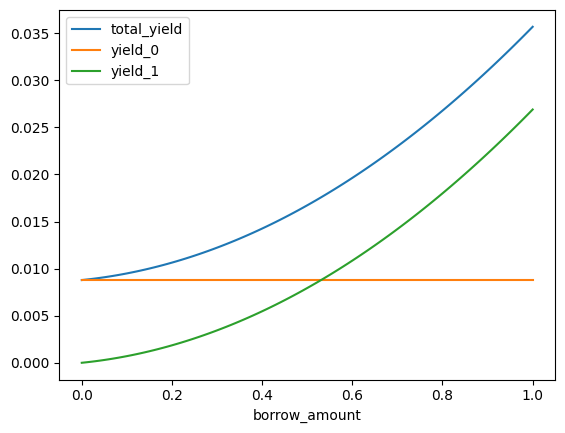

In [54]:
# plotting the yield when borrow_amount change
# => usually the yield is increasing with the borrow_amount change
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.yiop import yiop_allocation_algorithm
from sturdy.protocol import AllocateAssets
from sturdy.utils.misc import supply_rate

assets_and_pools = generate_assets_and_pools(num_pools=2)
pools = assets_and_pools['pools']
allocation  = yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))

pool_id = '1'
borrow_amount = np.arange(0, pools[pool_id]['reserve_size'] + 0.01, 0.01)
df = pd.DataFrame({'borrow_amount': borrow_amount})
pool_ids = [str(i) for i in range(len(pools))]
for pid in pool_ids:
    yields = []
    reserve_sizes = []
    util_rates = []
    for borrow_amount in df['borrow_amount']:
        if pid != pool_id:
            borrow_amount = pools[pid]['borrow_amount']
        reserve_size = pools[pid]['reserve_size'] + allocation[pid]
        util_rate = borrow_amount / reserve_size
        pool_yield = allocation[pid] * supply_rate(util_rate, pools[pid])
        yields.append(pool_yield)
        reserve_sizes.append(reserve_size)
        util_rates.append(util_rate)
    df[f'yield_{pid}'] = yields
    df[f'reserve_{pid}'] = reserve_sizes
    df[f'util_rate_{pid}'] = util_rates

df['total_yield'] = df['yield_0'] + df['yield_1']
df['total_reserve'] = df['reserve_0'] + df['reserve_1']
df[['borrow_amount', 'total_yield', 'yield_0', 'yield_1']].plot(0)

In [85]:
# Plotting yield according to borrow_amount & allocation
# Also display allocation point from sample allocations
import plotly.graph_objects as go
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sturdy.utils.misc import supply_rate

def target(alloc, borrow_amount, pool):
    util_rate = borrow_amount / (pool["reserve_size"] + alloc)
    pool_yield = alloc * supply_rate(util_rate, pool)
    return pool_yield


target_pool = '8'
pools = {'0': {'pool_id': '0', 'base_rate': 0.02, 'base_slope': 0.036, 'kink_slope': 0.388, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.02, 'base_slope': 0.09, 'kink_slope': 0.639, 'optimal_util_rate': 0.85, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '2': {'pool_id': '2', 'base_rate': 0.04, 'base_slope': 0.061, 'kink_slope': 0.765, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '3': {'pool_id': '3', 'base_rate': 0.02, 'base_slope': 0.059, 'kink_slope': 0.711, 'optimal_util_rate': 0.7, 'borrow_amount': 0.75, 'reserve_size': 1.0}, '4': {'pool_id': '4', 'base_rate': 0.03, 'base_slope': 0.093, 'kink_slope': 0.937, 'optimal_util_rate': 0.9, 'borrow_amount': 0.9, 'reserve_size': 1.0}, '5': {'pool_id': '5', 'base_rate': 0.01, 'base_slope': 0.099, 'kink_slope': 0.297, 'optimal_util_rate': 0.65, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '6': {'pool_id': '6', 'base_rate': 0.02, 'base_slope': 0.039, 'kink_slope': 0.982, 'optimal_util_rate': 0.85, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '7': {'pool_id': '7', 'base_rate': 0.01, 'base_slope': 0.028, 'kink_slope': 0.868, 'optimal_util_rate': 0.75, 'borrow_amount': 0.85, 'reserve_size': 1.0}, '8': {'pool_id': '8', 'base_rate': 0.04, 'base_slope': 0.054, 'kink_slope': 0.828, 'optimal_util_rate': 0.7, 'borrow_amount': 0.85, 'reserve_size': 1.0}, '9': {'pool_id': '9', 'base_rate': 0.03, 'base_slope': 0.033, 'kink_slope': 0.232, 'optimal_util_rate': 0.8, 'borrow_amount': 0.8, 'reserve_size': 1.0}}
# options = {'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.087, 'kink_slope': 0.922, 'optimal_util_rate': 0.75, 'borrow_amount': 0.7, 'reserve_size': 1.0}
options = pools[target_pool]
my_alloc = {'0': 0.0411, '1': 0.2705, '2': 0.2805, '3': 0.1969, '4': 0.3916, '5': 0.2522, '6': 0.0001, '7': 0.0614, '8': 0.3536, '9': 0.1515}
top_alloc = {'0': 0.10662337287158104, '1': 0.2533625774098979, '2': 0.23525900403185127, '3': 0.18401755315927146, '4': 0.36044025423796827, '5': 0.24496563561435203, '6': 0.05040238333764486, '7': 0.1222333211330441, '8': 0.3216033590983884, '9': 0.12109253910400115}
# Point of interest coordinates
x_highlight = my_alloc[target_pool]
y_highlight = pools[target_pool]['borrow_amount']
z_highlight = target(x_highlight, y_highlight, options)
x_top_highlight = top_alloc[target_pool]
y_top_highlight = pools[target_pool]['borrow_amount']
z_top_highlight = target(x_highlight, y_highlight, options)


# Setup the range for x and y
x_values = np.linspace(0, 2, 50)
y_values = np.linspace(0, 2, 50)

# Initialize the z values matrix
z_values = np.zeros((len(x_values), len(y_values)))

# Calculate z values using nested loops since the function accepts only scalar inputs
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        z_values[j, i] = target(x, y, options)
        if np.abs(x - 1.91836735) < 1e-5 and np.abs(y - 0.6122449) < 1e-5:
            print(target(x, y, options))

# Create a surface plot
fig = go.Figure(data=[go.Surface(z=z_values, x=x_values, y=y_values)])

# Add scatter plot on the same axes to highlight the specific point
fig.add_trace(go.Scatter3d(x=[x_highlight], y=[y_highlight], z=[z_highlight],
                           mode='markers', marker=dict(size=5, color='red')))
fig.add_trace(go.Scatter3d(x=[x_top_highlight], y=[y_top_highlight], z=[z_top_highlight],
                           mode='markers', marker=dict(size=5, color='white')))


# Update plot layout
fig.update_layout(title='3D Plot Pool Yield according to alloccation & borrow_amount', autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(
                    xaxis_title='Allocation',  # Label for the X axis
                    yaxis_title='Borrow Amount',  # Label for the Y axis
                    zaxis_title='Pool Yield'   # Label for the Z axis
    )
                  )

# Show plot
fig.show()

0.022611440222400685


In [251]:
# Plotting yield according to borrow_amount & allocation
# Also display allocation point from sample allocations
import copy
from typing import Dict
import plotly.graph_objects as go
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sturdy.validator.simulator import Simulator


def borrow_rate(util_rate: float, pool: Dict) -> float:
    # interest_rate = (
    #     pool["base_rate"] + (util_rate / pool["optimal_util_rate"]) * pool["base_slope"]
    #     if util_rate < pool["optimal_util_rate"]
    #     else pool["base_rate"]
    #     + pool["base_slope"]
    #     + ((util_rate - pool["optimal_util_rate"]) / (1 - pool["optimal_util_rate"]))
    #     * pool["kink_slope"]
    # )
    interest_rate = (
        pool["base_rate"]
        + pool["base_slope"]
        + ((util_rate - pool["optimal_util_rate"]) / (1 - pool["optimal_util_rate"]))
        * pool["kink_slope"]
    )

    # interest_rate = (
    #     pool["base_rate"] + (util_rate / pool["optimal_util_rate"]) * pool["base_slope"]
    # )
    return interest_rate


def supply_rate(util_rate: float, pool: Dict) -> float:
    return util_rate * borrow_rate(util_rate, pool)

def target(alloc, borrow_amount, pool):
    util_rate = borrow_amount / (pool["reserve_size"] + alloc)
    pool_yield = alloc * supply_rate(util_rate, pool)
    return pool_yield


def add_yield_for_allocation(pool_history, allocation, fig, color='red'):
    for idx, hist in enumerate(pool_history):
        symbol = 'diamond' if idx == 0 else 'circle'  # highlight first point
        opacity = 1 if idx == 0 else 0.5  # highlight first point
        size = 8 if idx == 0 else 3
        x_highlight = allocation[target_pool]
        y_highlight = hist[target_pool]['borrow_amount']
        z_highlight = target(x_highlight, y_highlight, options)
        # Add scatter plot on the same axes to highlight the specific point
        fig.add_trace(go.Scatter3d(x=[x_highlight], y=[y_highlight], z=[z_highlight],
                                mode='markers', marker=dict(size=size, color=color, symbol=symbol, opacity=opacity)))


target_pool = '0'
assets_and_pools = {'total_assets': 0.6, 'pools': {'0': {'pool_id': '0', 'base_rate': 0.05, 'base_slope': 0.045, 'kink_slope': 0.868, 'optimal_util_rate': 0.8, 'borrow_amount': 0.9, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.02, 'base_slope': 0.035, 'kink_slope': 0.763, 'optimal_util_rate': 0.8, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '2': {'pool_id': '2', 'base_rate': 0.04, 'base_slope': 0.014, 'kink_slope': 0.807, 'optimal_util_rate': 0.65, 'borrow_amount': 0.8, 'reserve_size': 1.0}, '3': {'pool_id': '3', 'base_rate': 0.04, 'base_slope': 0.074, 'kink_slope': 0.281, 'optimal_util_rate': 0.9, 'borrow_amount': 0.9, 'reserve_size': 1.0}, '4': {'pool_id': '4', 'base_rate': 0.05, 'base_slope': 0.047, 'kink_slope': 0.253, 'optimal_util_rate': 0.9, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '5': {'pool_id': '5', 'base_rate': 0.01, 'base_slope': 0.038, 'kink_slope': 0.341, 'optimal_util_rate': 0.8, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '6': {'pool_id': '6', 'base_rate': 0.02, 'base_slope': 0.086, 'kink_slope': 0.682, 'optimal_util_rate': 0.7, 'borrow_amount': 0.8, 'reserve_size': 1.0}, '7': {'pool_id': '7', 'base_rate': 0.05, 'base_slope': 0.096, 'kink_slope': 0.832, 'optimal_util_rate': 0.7, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '8': {'pool_id': '8', 'base_rate': 0.05, 'base_slope': 0.1, 'kink_slope': 0.659, 'optimal_util_rate': 0.75, 'borrow_amount': 0.55, 'reserve_size': 1.0}, '9': {'pool_id': '9', 'base_rate': 0.05, 'base_slope': 0.1, 'kink_slope': 0.241, 'optimal_util_rate': 0.9, 'borrow_amount': 0.85, 'reserve_size': 1.0}}}
# options = {'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.087, 'kink_slope': 0.922, 'optimal_util_rate': 0.75, 'borrow_amount': 0.7, 'reserve_size': 1.0}
options = pools[target_pool]
my_alloc = {'0': 0.059313933663, '1': 0.0, '2': 0.086214405598, '3': 0.109455902468, '4': 0.0, '5': 0.0, '6': 0.067177715357, '7': 0.107585342652, '8': 0.0, '9': 0.170252700259}
top_alloc = {'0': 0.059313933663, '1': 0.0, '2': 0.086214405598, '3': 0.109455902468, '4': 0.0, '5': 0.0, '6': 0.067177715357, '7': 0.107585342652, '8': 0.0, '9': 0.170252700259}
best_alloc = {'0': 0.21328915729154016, '1': 0.09498293460357368, '2': 0.27443219019440807, '3': 0.16538429198625892, '4': 0.07432036468671716, '5': 0.10311784395025728, '6': 0.2550801896211252, '7': 0.2146611485471236, '8': 0.10170059528946562, '9': 0.1570948809020659}

# Point of interest coordinates according to simulator
simulator = Simulator()
simulator.initialize()
simulator.init_data(copy.deepcopy(assets_and_pools), top_alloc)
simulator.reset()
simulator.init_data(copy.deepcopy(assets_and_pools), top_alloc)
simulator.update_reserves_with_allocs()
simulator.run()

# Setup the range for x and y
x_values = np.linspace(-0.1, 1.2, 50)
y_values = np.linspace(-0.1, 1.2, 50)

# Initialize the z values matrix
z_values = np.zeros((len(x_values), len(y_values)))

# Calculate z values using nested loops since the function accepts only scalar inputs
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        z_values[j, i] = target(x, y, options)

# Create a surface plot
fig = go.Figure(data=[go.Surface(z=z_values, x=x_values, y=y_values, opacity=0.5)])

add_yield_for_allocation(simulator.pool_history, top_alloc, fig, color='red')
add_yield_for_allocation(simulator.pool_history, my_alloc, fig, color='white')
add_yield_for_allocation(simulator.pool_history, best_alloc, fig, color='blue')

# Update plot layout
fig.update_layout(title='3D Plot Pool Yield according to alloccation & borrow_amount', autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(
                    xaxis_title='Allocation',  # Label for the X axis
                    yaxis_title='Borrow Amount',  # Label for the Y axis
                    zaxis_title='Pool Yield'   # Label for the Z axis
    )
                  )

# Show plot
fig.show()

In [248]:
%load_ext autoreload
%autoreload 2
from scipy.optimize import minimize
from sturdy.igreedy import igreedy_allocation_algorithm, igreedy_orthogonal_allocation_allocations
from sturdy.utils import yiop
from sturdy.utils.yiop import yiop_allocation_algorithm
from sturdy.protocol import AllocateAssets

pool = pools[target_pool]
borrow_amount = 1.2

assets_and_pools = {'total_assets': 0.6, 'pools': {'0': {'pool_id': '0', 'base_rate': 0.05, 'base_slope': 0.045, 'kink_slope': 0.868, 'optimal_util_rate': 0.8, 'borrow_amount': 0.9, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.02, 'base_slope': 0.035, 'kink_slope': 0.763, 'optimal_util_rate': 0.8, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '2': {'pool_id': '2', 'base_rate': 0.04, 'base_slope': 0.014, 'kink_slope': 0.807, 'optimal_util_rate': 0.65, 'borrow_amount': 0.8, 'reserve_size': 1.0}, '3': {'pool_id': '3', 'base_rate': 0.04, 'base_slope': 0.074, 'kink_slope': 0.281, 'optimal_util_rate': 0.9, 'borrow_amount': 0.9, 'reserve_size': 1.0}, '4': {'pool_id': '4', 'base_rate': 0.05, 'base_slope': 0.047, 'kink_slope': 0.253, 'optimal_util_rate': 0.9, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '5': {'pool_id': '5', 'base_rate': 0.01, 'base_slope': 0.038, 'kink_slope': 0.341, 'optimal_util_rate': 0.8, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '6': {'pool_id': '6', 'base_rate': 0.02, 'base_slope': 0.086, 'kink_slope': 0.682, 'optimal_util_rate': 0.7, 'borrow_amount': 0.8, 'reserve_size': 1.0}, '7': {'pool_id': '7', 'base_rate': 0.05, 'base_slope': 0.096, 'kink_slope': 0.832, 'optimal_util_rate': 0.7, 'borrow_amount': 0.7, 'reserve_size': 1.0}, '8': {'pool_id': '8', 'base_rate': 0.05, 'base_slope': 0.1, 'kink_slope': 0.659, 'optimal_util_rate': 0.75, 'borrow_amount': 0.55, 'reserve_size': 1.0}, '9': {'pool_id': '9', 'base_rate': 0.05, 'base_slope': 0.1, 'kink_slope': 0.241, 'optimal_util_rate': 0.9, 'borrow_amount': 0.85, 'reserve_size': 1.0}}}
yiop_alloc = yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))
# my_alloc = igreedy_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))
my_ortho_alloc = igreedy_orthogonal_allocation_allocations(AllocateAssets(assets_and_pools=assets_and_pools))

# print('my_alloc', my_alloc)
print('my_ortho_alloc', my_ortho_alloc)
print('yiop', yiop_alloc)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
best allocations {'0': 0.21328915729154016, '1': 0.09498293460357368, '2': 0.27443219019440807, '3': 0.16538429198625892, '4': 0.07432036468671716, '5': 0.10311784395025728, '6': 0.2550801896211252, '7': 0.2146611485471236, '8': 0.10170059528946562, '9': 0.1570948809020659}
my_ortho_alloc {'0': 0.059313933663, '1': 0.0, '2': 0.086214405598, '3': 0.109455902468, '4': 0.0, '5': 0.0, '6': 0.067177715357, '7': 0.107585342652, '8': 0.0, '9': 0.170252700259}
yiop {'0': 0.059313933663, '1': 0.0, '2': 0.086214405598, '3': 0.109455902468, '4': 0.0, '5': 0.0, '6': 0.067177715357, '7': 0.107585342652, '8': 0.0, '9': 0.170252700259}


In [227]:
vec = {'0': 0.054567389904110475, '1': -0.010554127361119091, '2': 0.08244573564612763, '3': -0.04476598453178382, '4': -0.010554127361119091, '5': -0.010554127361119091, '6': 0.0812500511110405, '7': -0.013089887760385792, '8': -0.010554127361119091, '9': -0.11819079492463264}
np.array(list(vec.values())).sum()

1.3877787807814457e-17